the Best Way to understand their experiment is to draw the figure they have

Figure 2f

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

F2 = pd.read_excel('DataSI.xlsx','Table S4')

In [4]:
F2.head()

,Entry,Tafel Slope/ V dec-1,Effective Voltage/ V,Onset potential/ V,Yield/ %
0,1-1,0.66,1.63,1.26,76
1,1-2,0.50,1.96,1.83,0
2,1-3,0.27,1.03,0.84,0
3,1-4,0.59,1.58,1.20,80
4,1-5,0.70,1.5,1.11,0


In [40]:
TF = F2.iloc[:,1].to_list()[:16]
OP = F2.iloc[:,3].to_list()[:16]
YD = [x if x != "Trace" else  0 for x in F2.iloc[:,4].to_list() ][:16]


In [41]:
from scipy.interpolate import griddata
import numpy as np

rng = np.random.default_rng()
grid_x, grid_y = np.mgrid[0.2:1.8:0.01, 0:6:0.01]

res = griddata(
	(TF, OP),
	YD,(grid_x, grid_y),
	fill_value=True,
    method='linear')



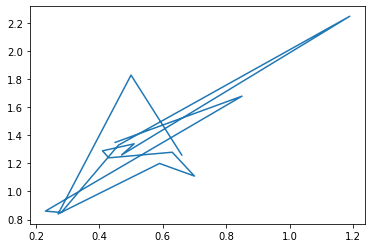

In [43]:
plt.plot(TF, OP)


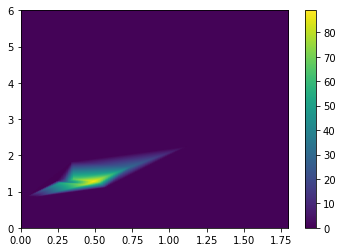

In [48]:
plt.imshow(res.T,extent=(0,1.8,0,6),origin='lower',aspect="auto")
plt.colorbar()